In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import random

In [2]:
import os 
import cv2

In [3]:
sdata=np.load("s_2.npy")
ndata=np.load("ns_5.npy")

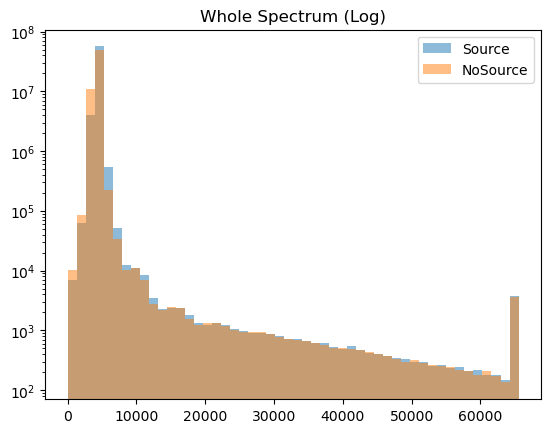

In [4]:
plt.hist(sdata.ravel(),bins=50,label="Source",alpha=0.5,log=True)
plt.hist(ndata.ravel(),bins=50,label="NoSource",alpha=0.5,log=True)
plt.title("Whole Spectrum (Log)")
plt.legend()
plt.savefig("Whole Spectrum (Log)")
plt.show()

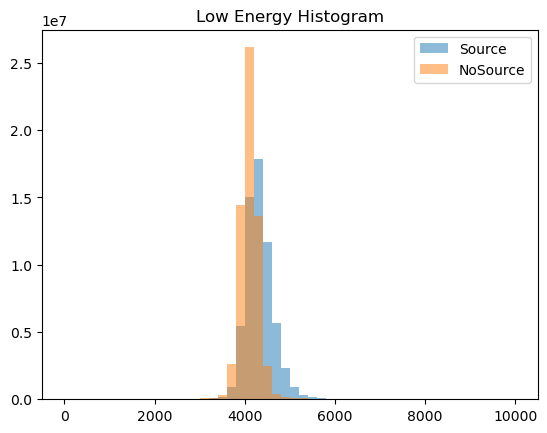

In [5]:
plt.hist(sdata.ravel(),bins=50,range=[0,10000],label="Source",alpha=0.5)
plt.hist(ndata.ravel(),bins=50,range=[0,10000],label="NoSource",alpha=0.5)
plt.title("Low Energy Histogram")
plt.legend()
plt.savefig("Low Energy Histogram")
plt.show()

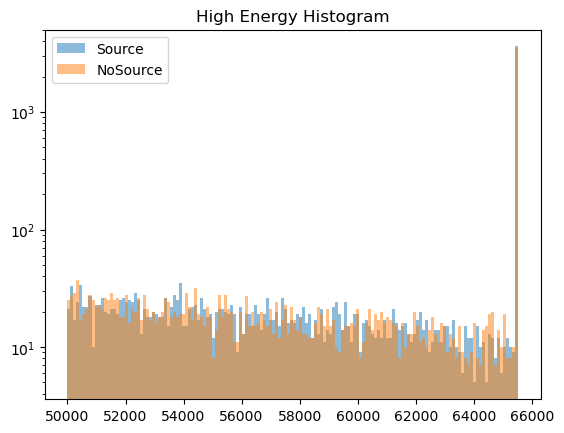

In [6]:
plt.hist(sdata.ravel(),bins=150,range=[50000,65536],label="Source",alpha=0.5,log=True)
plt.hist(ndata.ravel(),bins=150,range=[50000,65536],label="NoSource",alpha=0.5,log=True)
plt.title("High Energy Histogram")
plt.legend()
plt.savefig("High Energy Histogram")
plt.show()

In [20]:
def cv_filter(img):
    n_img = img.copy()
    n_img[np.where(img<4000)]=4000
    n_img[np.where(img>8000)]=4000
    n_img = n_img - 4000
    return n_img

In [21]:
def auto_correlation(img_new):
    #Autocorrelation calculations
    img = np.pad(img_new, pad_width=1)
    img1 = np.roll(img, 1, axis=0)
    img2 = np.roll(img, -1, axis=0)
    img3 = np.roll(img, 1, axis=1)
    img4 = np.roll(img, -1, axis=1)

    img5 = np.roll(img1, 1, axis=1)
    img6 = np.roll(img1, -1, axis=1)
    img7 = np.roll(img2, 1, axis=1)
    img8 = np.roll(img2, -1, axis=1)

    #Element wise multiplication of matrices
    conv_img = img*img1 + img*img2 + img*img3 + img*img4 + img*img5 + img*img6 + img*img7 + img*img8

    #Renormalization of image
    conv_img = conv_img
    conv_img = np.power(conv_img, 0.5)
    
    return conv_img

In [22]:
nsdata = cv_filter(sdata)
nndata = cv_filter(ndata)


gsdata=cv2.GaussianBlur(nsdata, (3, 3), 0)
gndata=cv2.GaussianBlur(nndata, (3, 3), 0)

qdata = nsdata.copy()
qdata[ gndata > gsdata ] = 0 

print(np.mean(ndata))
print(np.mean(nndata))

4118.751351438573
140.62084167706357


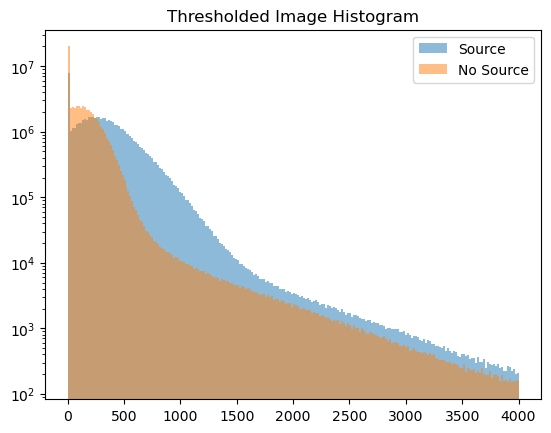

In [23]:
#plots histogram of thresholded image
plt.hist(nsdata.ravel(), bins=226,alpha=0.5,label="Source",log=True)
plt.hist(nndata.ravel(), bins=226,alpha=0.5,label="No Source",log=True)
plt.title("Thresholded Image Histogram")
plt.legend()
plt.show()

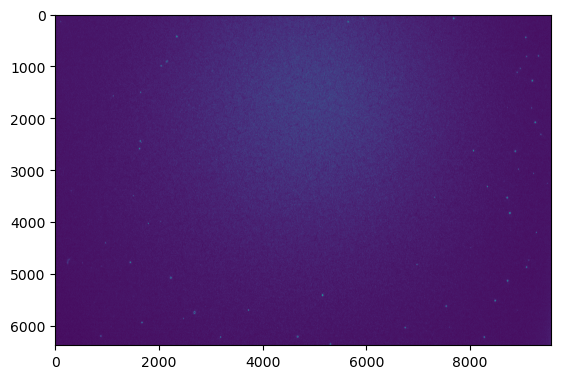

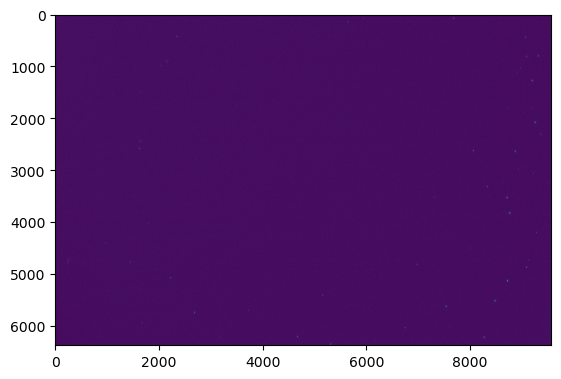

In [30]:
plt.imshow(nsdata)
plt.show()

plt.imshow(nndata)
plt.show()

In [24]:
csdata = auto_correlation(nsdata)
cndata = auto_correlation(nndata)

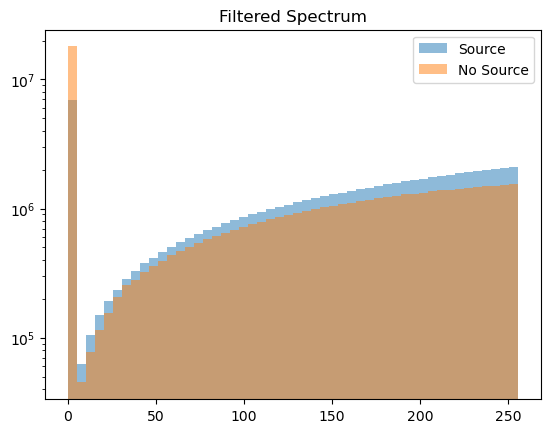

In [25]:
#plots histogram of thresholded image
plt.hist(csdata.ravel(), bins=50,alpha=0.5,label="Source",log=True)
plt.hist(cndata.ravel(), bins=50,alpha=0.5,label="No Source",log=True)
plt.title("Filtered Spectrum")
plt.legend()
plt.savefig("Filtered Spectrum")
plt.show()

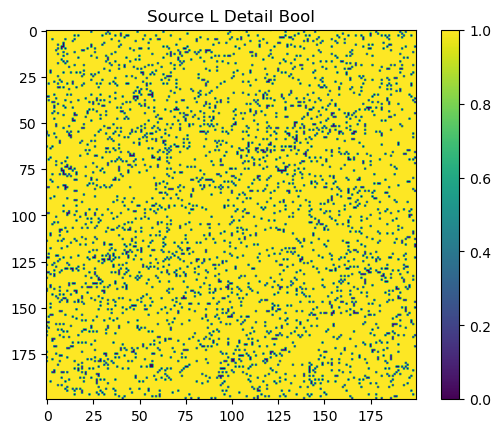

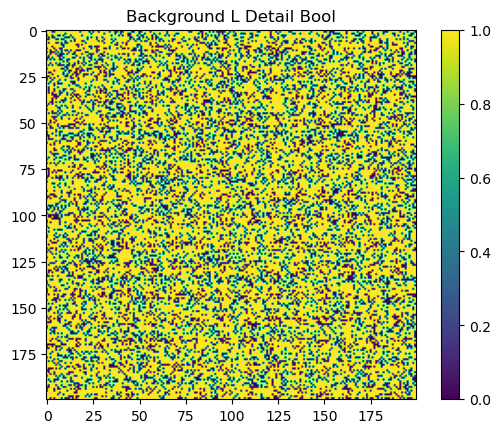

In [26]:
x=2000
y=2000
plt.imshow(csdata[x-100:x+100,y-100:y+100]>5)
plt.colorbar()
plt.title("Source L Detail Bool")
plt.savefig("Source L Detail Bool")
plt.show()

plt.imshow(cndata[x-100:x+100,y-100:y+100]>5)
plt.title("Background L Detail Bool")
plt.savefig("Background L Detail Bool")
plt.colorbar()
plt.show()

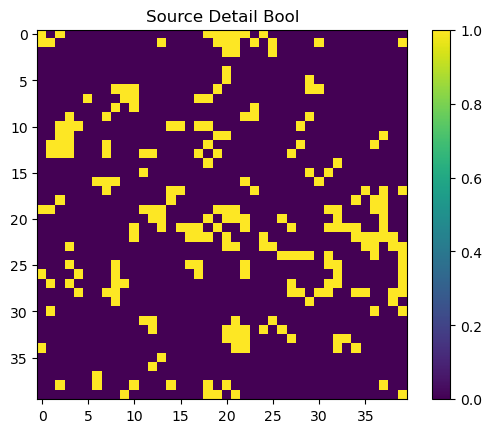

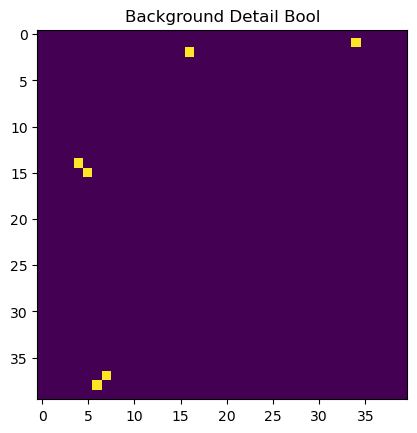

In [31]:
x=2000
y=2000
n=20
plt.imshow(csdata[x-n:x+n,y-n:y+n]>5)
plt.colorbar()
plt.title("Source Detail Bool")
plt.savefig("Source Detail Bool")
plt.show()

plt.imshow(cndata[x-n:x+n,y-n:y+n]>5)
plt.title("Background Detail Bool")
plt.savefig("Background Detail Bool")
plt.show()

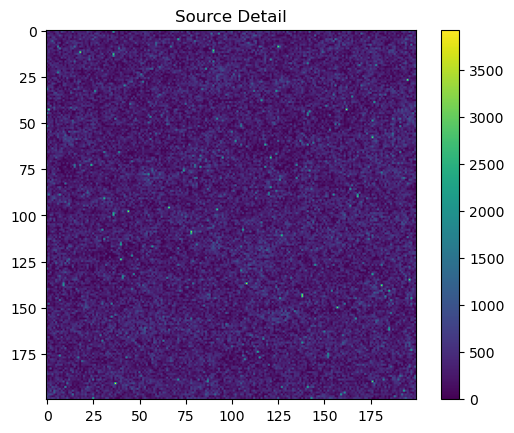

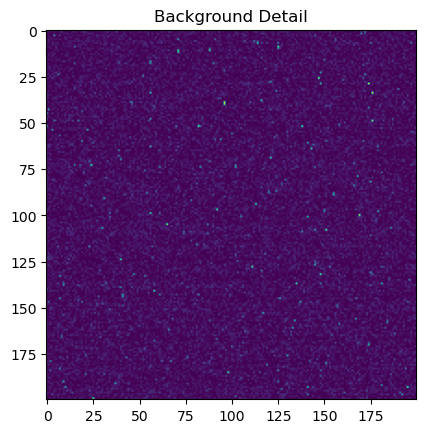

In [28]:
x=2000
y=2000
n=100
plt.imshow(nsdata[x-n:x+n,y-n:y+n])
plt.colorbar()
plt.title("Source Detail")
plt.savefig("Source Detail")
plt.show()

plt.imshow(nndata[x-n:x+n,y-n:y+n])
plt.title("Background Detail")
plt.savefig("Background Detail")
plt.show()

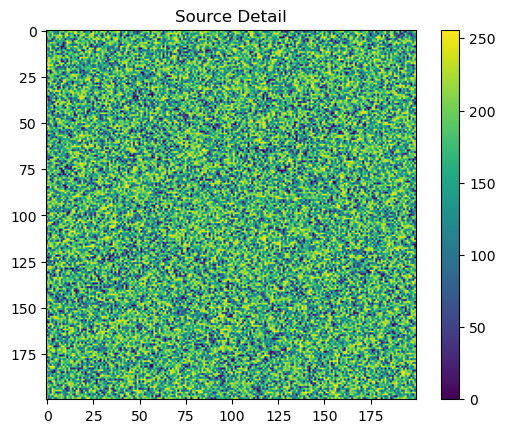

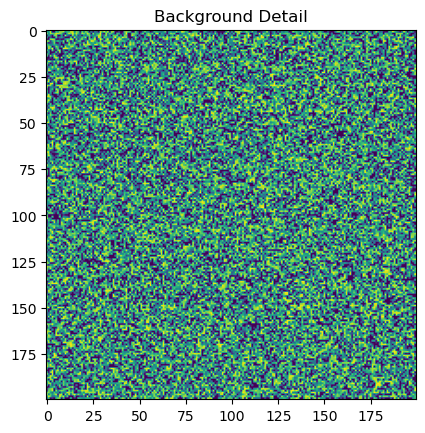

In [27]:
x=2000
y=2000
n=100
plt.imshow(csdata[x-n:x+n,y-n:y+n])
plt.colorbar()
plt.title("Source Detail")
plt.savefig("Source Detail")
plt.show()

plt.imshow(cndata[x-n:x+n,y-n:y+n])
plt.title("Background Detail")
plt.savefig("Background Detail")
plt.show()

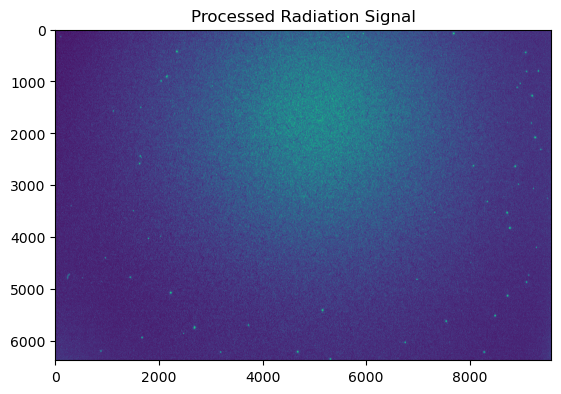

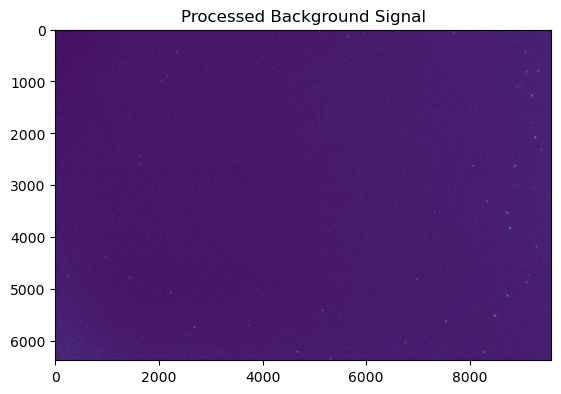

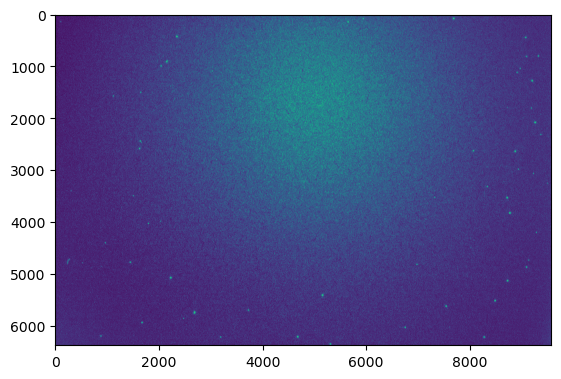

In [19]:
plt.imshow(csdata)
plt.title("Processed Radiation Signal")
plt.savefig("Processed Radiation Signal")
plt.show()


plt.imshow(cndata)
plt.title("Processed Background Signal")
plt.savefig("Processed Background Signal")
plt.show()


plt.imshow(cqdata)
plt.show()